In [2]:
import pandas as pd
import nltk
import re
from nltk.corpus import stopwords
from nltk.tokenize import sent_tokenize
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
wordnet = WordNetLemmatizer()
import string
from nltk.stem.porter import PorterStemmer
ps= PorterStemmer()

# 1. Data collection and preprocessing

In [3]:
#Data collection
df= pd.read_csv('covid_abstracts.csv')
df.head()

,title,abstract,url
0,Real-World Experience with COVID-19 Including...,This article summarizes the experiences of COV...,https://pubmed.ncbi.nlm.nih.gov/35008137
1,Successful outcome of pre-engraftment COVID-19...,Coronavirus disease 2019 COVID-19 caused by...,https://pubmed.ncbi.nlm.nih.gov/35008104
2,The impact of COVID-19 on oncology professiona...,BACKGROUND COVID-19 has had a significant imp...,https://pubmed.ncbi.nlm.nih.gov/35007996
3,ICU admission and mortality classifiers for CO...,The coronavirus disease 2019 COVID-19 which ...,https://pubmed.ncbi.nlm.nih.gov/35007991
4,Clinical evaluation of nasopharyngeal midturb...,In the setting of supply chain shortages of na...,https://pubmed.ncbi.nlm.nih.gov/35007959


In [4]:
df.shape

(10000, 3)

In [5]:
#reducing the size of the data

new_reduced_data=df.iloc[:1000,:]
new_reduced_data.head()

,title,abstract,url
0,Real-World Experience with COVID-19 Including...,This article summarizes the experiences of COV...,https://pubmed.ncbi.nlm.nih.gov/35008137
1,Successful outcome of pre-engraftment COVID-19...,Coronavirus disease 2019 COVID-19 caused by...,https://pubmed.ncbi.nlm.nih.gov/35008104
2,The impact of COVID-19 on oncology professiona...,BACKGROUND COVID-19 has had a significant imp...,https://pubmed.ncbi.nlm.nih.gov/35007996
3,ICU admission and mortality classifiers for CO...,The coronavirus disease 2019 COVID-19 which ...,https://pubmed.ncbi.nlm.nih.gov/35007991
4,Clinical evaluation of nasopharyngeal midturb...,In the setting of supply chain shortages of na...,https://pubmed.ncbi.nlm.nih.gov/35007959


In [6]:
#Removing noise from the dataset (noice include stopwords, punctuations, HTML tags, Numerical character, Non alphabetic characters)
def remove_noise(data):
    # Converting to lower case
    data= data.lower()
    
    # Remove HTML tags
    data= re.sub(r'<.*?>', '', data)
    
    # Remove numerical characters
    data= re.sub(r'\d+', '', data)
    
    # Remove punctuation
    data= data.translate(str.maketrans('', '', string.punctuation))
    
    return data

new_reduced_data['noise_free_abstract'] = new_reduced_data['abstract'].apply(remove_noise)
new_reduced_data.head()

C:\Users\HP\AppData\Local\Temp\ipykernel_1088\335085691.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_reduced_data['noise_free_abstract'] = new_reduced_data['abstract'].apply(remove_noise)


,title,abstract,url,noise_free_abstract
0,Real-World Experience with COVID-19 Including...,This article summarizes the experiences of COV...,https://pubmed.ncbi.nlm.nih.gov/35008137,this article summarizes the experiences of cov...
1,Successful outcome of pre-engraftment COVID-19...,Coronavirus disease 2019 COVID-19 caused by...,https://pubmed.ncbi.nlm.nih.gov/35008104,coronavirus disease covid caused by severe...
2,The impact of COVID-19 on oncology professiona...,BACKGROUND COVID-19 has had a significant imp...,https://pubmed.ncbi.nlm.nih.gov/35007996,background covid has had a significant impact...
3,ICU admission and mortality classifiers for CO...,The coronavirus disease 2019 COVID-19 which ...,https://pubmed.ncbi.nlm.nih.gov/35007991,the coronavirus disease covid which is caus...
4,Clinical evaluation of nasopharyngeal midturb...,In the setting of supply chain shortages of na...,https://pubmed.ncbi.nlm.nih.gov/35007959,in the setting of supply chain shortages of na...


In [7]:
#Tokenizing the text and performing lemmatization

def tokenize_stem(data):
    tokens = word_tokenize(data)
    
    # Removing stopwords and applying lemmatization
    tokens= [wordnet.lemmatize(word) for word in tokens if not word in set(stopwords.words('english'))]
    
    # Joining tokens back in string
    clean_text = ' '.join(tokens)
    
    return clean_text

new_reduced_data['clean_abstract'] = new_reduced_data['noise_free_abstract'].apply(tokenize_stem)

C:\Users\HP\AppData\Local\Temp\ipykernel_1088\3984688861.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_reduced_data['clean_abstract'] = new_reduced_data['noise_free_abstract'].apply(tokenize_stem)


In [8]:
new_reduced_data.head()

,title,abstract,url,noise_free_abstract,clean_abstract
0,Real-World Experience with COVID-19 Including...,This article summarizes the experiences of COV...,https://pubmed.ncbi.nlm.nih.gov/35008137,this article summarizes the experiences of cov...,article summarizes experience covid patient di...
1,Successful outcome of pre-engraftment COVID-19...,Coronavirus disease 2019 COVID-19 caused by...,https://pubmed.ncbi.nlm.nih.gov/35008104,coronavirus disease covid caused by severe...,coronavirus disease covid caused severe acute ...
2,The impact of COVID-19 on oncology professiona...,BACKGROUND COVID-19 has had a significant imp...,https://pubmed.ncbi.nlm.nih.gov/35007996,background covid has had a significant impact...,background covid significant impact wellbeing ...
3,ICU admission and mortality classifiers for CO...,The coronavirus disease 2019 COVID-19 which ...,https://pubmed.ncbi.nlm.nih.gov/35007991,the coronavirus disease covid which is caus...,coronavirus disease covid caused severe acute ...
4,Clinical evaluation of nasopharyngeal midturb...,In the setting of supply chain shortages of na...,https://pubmed.ncbi.nlm.nih.gov/35007959,in the setting of supply chain shortages of na...,setting supply chain shortage nasopharyngeal n...


In [9]:
new_data= new_reduced_data[['title', 'clean_abstract', 'url']]
new_data.head()

,title,clean_abstract,url
0,Real-World Experience with COVID-19 Including...,article summarizes experience covid patient di...,https://pubmed.ncbi.nlm.nih.gov/35008137
1,Successful outcome of pre-engraftment COVID-19...,coronavirus disease covid caused severe acute ...,https://pubmed.ncbi.nlm.nih.gov/35008104
2,The impact of COVID-19 on oncology professiona...,background covid significant impact wellbeing ...,https://pubmed.ncbi.nlm.nih.gov/35007996
3,ICU admission and mortality classifiers for CO...,coronavirus disease covid caused severe acute ...,https://pubmed.ncbi.nlm.nih.gov/35007991
4,Clinical evaluation of nasopharyngeal midturb...,setting supply chain shortage nasopharyngeal n...,https://pubmed.ncbi.nlm.nih.gov/35007959


### Exploring the data

In [10]:
all_abstracts = ' '.join(new_data['clean_abstract'])
all_abstracts

'article summarizes experience covid patient diagnosed treated faulkton area medical center famc rural critical access facility south dakota three period covid retrospective chart review used classify covid patient three group time frame early march arrival covid south dakota august september use rapid result direct covid virus antigen testing november took place covid surge november start bamlanivimab infusion highrisk patient covid throughfebruary cutoff review faulk county higher covid case rate covid death rate south dakota general final review data showed stable overall hospitalization rate famc time period data broken age demographic due small patient population size limited ability blind data breakdown data showed hospitalization rate age group decrease percent percent following bamlanivimab use absolute risk reduction percent relative risk reduction hospitalization november february compared september november odds ratio ci percent statistically significant nnt data limited sma

In [11]:
tokens = word_tokenize(all_abstracts)
from nltk import FreqDist

# Calculate word frequency distribution
frequency_distribution = FreqDist(tokens)

# Display the top 10 words with frequency
top_20=frequency_distribution.most_common(20)
print(top_20)

[('covid', 2666), ('patient', 1587), ('study', 1159), ('pandemic', 1093), ('sarscov', 932), ('health', 767), ('result', 740), ('disease', 686), ('infection', 601), ('method', 532), ('vaccine', 525), ('data', 492), ('p', 491), ('risk', 442), ('group', 427), ('case', 427), ('conclusion', 417), ('associated', 413), ('coronavirus', 409), ('clinical', 402)]


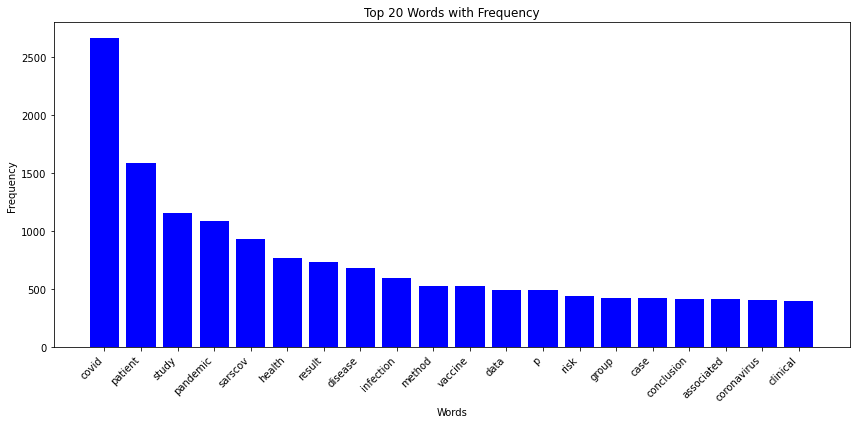

In [12]:
# Extract words and frequencies
import matplotlib.pyplot as plt
words, frequencies = zip(*top_20)

# Plot the bar chart
plt.figure(figsize=(12, 6))
plt.bar(words, frequencies, color='blue')
plt.title('Top 20 Words with Frequency')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better visibility
plt.tight_layout()
plt.show()

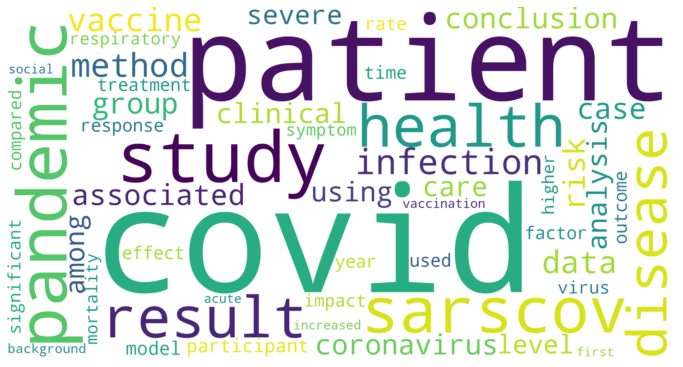

In [13]:
#Using Wordcloud to visual display top 50 words
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS
title = ' '.join(new_data['clean_abstract'])

# generate Word Cloud
word_cloud = WordCloud(collocations=False,
                       background_color='white',max_words=50, stopwords=STOPWORDS, min_word_length=4,
                       width=2048, height=1080).generate(title)

# Display the generated Word Cloud
plt.figure(figsize=(12,8))
plt.imshow(word_cloud, interpolation='bilinear')
plt.axis("off")
plt.show()

# 2. Entity recognition and relationship extraction

In [ ]:
Implement NER (Named Entity Recognition) to identify entities such as authors, organizations, 
and key terms within the research papers. 
Use an NLP library or tool of your choice for this task.

#### Extracting Names of authors, organizations and key terms within the research papers

In [14]:
#extracting name of authors
from bs4 import BeautifulSoup
import requests
def get_authorlist(url):
    response = requests.get(url)
    soup = BeautifulSoup(response.text, 'html.parser')
    author_list = []
    for anchor in soup.find_all('a', class_='full-name'):
        author_list.append(anchor.text)
    return list(set(author_list))


new_data['authorlist'] = new_data['url'].apply(lambda x: get_authorlist(x))

C:\Users\HP\AppData\Local\Temp\ipykernel_1088\2770083027.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_data['authorlist'] = new_data['url'].apply(lambda x: get_authorlist(x))


In [15]:
new_data

,title,clean_abstract,url,authorlist
0,Real-World Experience with COVID-19 Including...,article summarizes experience covid patient di...,https://pubmed.ncbi.nlm.nih.gov/35008137,"[Nancy Schweitzer, Benjamin Loewen, Sylvia And..."
1,Successful outcome of pre-engraftment COVID-19...,coronavirus disease covid caused severe acute ...,https://pubmed.ncbi.nlm.nih.gov/35008104,"[Daisy Johnson, Veronica Karpinski, John A Zai..."
2,The impact of COVID-19 on oncology professiona...,background covid significant impact wellbeing ...,https://pubmed.ncbi.nlm.nih.gov/35007996,"[M Lambertini, E Élez, B Devnani, G Morgan, J ..."
3,ICU admission and mortality classifiers for CO...,coronavirus disease covid caused severe acute ...,https://pubmed.ncbi.nlm.nih.gov/35007991,"[Haralampos Milionis, Vasileios C Pezoulas, Co..."
4,Clinical evaluation of nasopharyngeal midturb...,setting supply chain shortage nasopharyngeal n...,https://pubmed.ncbi.nlm.nih.gov/35007959,"[Angela R Schneider, Byron M Berenger, Jia Hu,..."
...,...,...,...,...
995,Feasibility of Using a Mobile App for Stress i...,background middleaged adult year report higher...,https://pubmed.ncbi.nlm.nih.gov/34989677,"[Megan Puzia, Linda Larkey, Diane Ehlers, Brea..."
996,Obatoclax inhibits SARS-CoV-2 entry by altered...,coronavirus disease covid caused emerging seve...,https://pubmed.ncbi.nlm.nih.gov/34989664,"[Yong Lin, Yingying Deng, Shilei Xu, Denise Me..."
997,The societal economic value of COVID-19 vaccin...,aim covid pandemic claimed life people united ...,https://pubmed.ncbi.nlm.nih.gov/34989654,"[Yashna Shivdasani, Jessica Lu, Brahim Bookhar..."
998,The use of tele-audiology in ototoxicity monit...,introduction due growing burden disease south ...,https://pubmed.ncbi.nlm.nih.gov/34989631,"[Nazeera Peerbhay, Jessica Paken, Fisokuhle La..."


In [16]:
#Extracting keywords
import requests
from bs4 import BeautifulSoup

# Function to extract keywords from HTML content
def extract_keywords_from_url(url):
    response = requests.get(url)

    if response.status_code == 200:
        html_content = response.text
        soup = BeautifulSoup(html_content, 'html.parser')
        strong_tag = soup.find('strong', class_='sub-title')

        if strong_tag:
            keywords = strong_tag.next_sibling.strip()
            new_keys=keywords.split(";")
            
            return new_keys
        else:
            return []
    else:
        return []
    
new_data['keywords'] = new_data['url'].apply(extract_keywords_from_url)

In [17]:
new_data

,title,clean_abstract,url,authorlist,keywords
0,Real-World Experience with COVID-19 Including...,article summarizes experience covid patient di...,https://pubmed.ncbi.nlm.nih.gov/35008137,"[Nancy Schweitzer, Benjamin Loewen, Sylvia And...",[]
1,Successful outcome of pre-engraftment COVID-19...,coronavirus disease covid caused severe acute ...,https://pubmed.ncbi.nlm.nih.gov/35008104,"[Daisy Johnson, Veronica Karpinski, John A Zai...",[]
2,The impact of COVID-19 on oncology professiona...,background covid significant impact wellbeing ...,https://pubmed.ncbi.nlm.nih.gov/35007996,"[M Lambertini, E Élez, B Devnani, G Morgan, J ...",[COVID-19 has had a significant impact on the ...
3,ICU admission and mortality classifiers for CO...,coronavirus disease covid caused severe acute ...,https://pubmed.ncbi.nlm.nih.gov/35007991,"[Haralampos Milionis, Vasileios C Pezoulas, Co...","[COVID-19, Dynamic Bayesian Networks (DBNs), ..."
4,Clinical evaluation of nasopharyngeal midturb...,setting supply chain shortage nasopharyngeal n...,https://pubmed.ncbi.nlm.nih.gov/35007959,"[Angela R Schneider, Byron M Berenger, Jia Hu,...","[COVID-19, Diagnostic testing, Molecular dia..."
...,...,...,...,...,...
995,Feasibility of Using a Mobile App for Stress i...,background middleaged adult year report higher...,https://pubmed.ncbi.nlm.nih.gov/34989677,"[Megan Puzia, Linda Larkey, Diane Ehlers, Brea...",[Middle-aged adults (40-65 years) report highe...
996,Obatoclax inhibits SARS-CoV-2 entry by altered...,coronavirus disease covid caused emerging seve...,https://pubmed.ncbi.nlm.nih.gov/34989664,"[Yong Lin, Yingying Deng, Shilei Xu, Denise Me...","[MCL-1, Obatoclax, SARS-CoV-2, endocytosis,..."
997,The societal economic value of COVID-19 vaccin...,aim covid pandemic claimed life people united ...,https://pubmed.ncbi.nlm.nih.gov/34989654,"[Yashna Shivdasani, Jessica Lu, Brahim Bookhar...",[The COVID-19 pandemic has claimed the lives o...
998,The use of tele-audiology in ototoxicity monit...,introduction due growing burden disease south ...,https://pubmed.ncbi.nlm.nih.gov/34989631,"[Nazeera Peerbhay, Jessica Paken, Fisokuhle La...",[Due to the growing burden of disease in South...


In [18]:
import requests
from bs4 import BeautifulSoup

# Function to extract affiliations from HTML content
def extract_affiliations(url):
    try:
        response = requests.get(url)
        response.raise_for_status()  # Raise HTTPError for bad responses

        html_content = response.text
        soup = BeautifulSoup(html_content, 'html.parser')

        # Find all li elements with data-affiliation-id attribute
        affiliations = [li.get_text(strip=True) for li in soup.find_all('li', {'data-affiliation-id': True})]

        return list(set(affiliations))
    except requests.exceptions.RequestException as e:
        print(f"Failed to fetch the HTML content for URL: {url}. Exception: {e}")
        return []



new_data['affiliations'] = new_data['url'].apply(lambda url: extract_affiliations(url))

Failed to fetch the HTML content for URL: https://pubmed.ncbi.nlm.nih.gov/35006185. Exception: 404 Client Error: Not Found for url: https://pubmed.ncbi.nlm.nih.gov/35006185/
Failed to fetch the HTML content for URL: https://pubmed.ncbi.nlm.nih.gov/35006181. Exception: 404 Client Error: Not Found for url: https://pubmed.ncbi.nlm.nih.gov/35006181/
Failed to fetch the HTML content for URL: https://pubmed.ncbi.nlm.nih.gov/35006162. Exception: 404 Client Error: Not Found for url: https://pubmed.ncbi.nlm.nih.gov/35006162/
Failed to fetch the HTML content for URL: https://pubmed.ncbi.nlm.nih.gov/35005725. Exception: 500 Server Error: Internal Server Error for url: https://pubmed.ncbi.nlm.nih.gov/35005725/
Failed to fetch the HTML content for URL: https://pubmed.ncbi.nlm.nih.gov/35005692. Exception: 500 Server Error: Internal Server Error for url: https://pubmed.ncbi.nlm.nih.gov/35005692/
Failed to fetch the HTML content for URL: https://pubmed.ncbi.nlm.nih.gov/35001257. Exception: 500 Server 

In [19]:
new_data

,title,clean_abstract,url,authorlist,keywords,affiliations
0,Real-World Experience with COVID-19 Including...,article summarizes experience covid patient di...,https://pubmed.ncbi.nlm.nih.gov/35008137,"[Nancy Schweitzer, Benjamin Loewen, Sylvia And...",[],"[1Faulkton Area Medical Center, Faulkton, Sout..."
1,Successful outcome of pre-engraftment COVID-19...,coronavirus disease covid caused severe acute ...,https://pubmed.ncbi.nlm.nih.gov/35008104,"[Daisy Johnson, Veronica Karpinski, John A Zai...",[],"[2Department of Infectious Disease, City of Ho..."
2,The impact of COVID-19 on oncology professiona...,background covid significant impact wellbeing ...,https://pubmed.ncbi.nlm.nih.gov/35007996,"[M Lambertini, E Élez, B Devnani, G Morgan, J ...",[COVID-19 has had a significant impact on the ...,"[8Vall d'Hebron Barcelona Hospital Campus, Val..."
3,ICU admission and mortality classifiers for CO...,coronavirus disease covid caused severe acute ...,https://pubmed.ncbi.nlm.nih.gov/35007991,"[Haralampos Milionis, Vasileios C Pezoulas, Co...","[COVID-19, Dynamic Bayesian Networks (DBNs), ...",[1Unit of Medical Technology and Intelligent I...
4,Clinical evaluation of nasopharyngeal midturb...,setting supply chain shortage nasopharyngeal n...,https://pubmed.ncbi.nlm.nih.gov/35007959,"[Angela R Schneider, Byron M Berenger, Jia Hu,...","[COVID-19, Diagnostic testing, Molecular dia...","[5Alberta Public Health Laboratory, Alberta Pr..."
...,...,...,...,...,...,...
995,Feasibility of Using a Mobile App for Stress i...,background middleaged adult year report higher...,https://pubmed.ncbi.nlm.nih.gov/34989677,"[Megan Puzia, Linda Larkey, Diane Ehlers, Brea...",[Middle-aged adults (40-65 years) report highe...,"[3University of Nebraska Medical Center, Omaha..."
996,Obatoclax inhibits SARS-CoV-2 entry by altered...,coronavirus disease covid caused emerging seve...,https://pubmed.ncbi.nlm.nih.gov/34989664,"[Yong Lin, Yingying Deng, Shilei Xu, Denise Me...","[MCL-1, Obatoclax, SARS-CoV-2, endocytosis,...","[3Department of General Surgery, The Third Aff..."
997,The societal economic value of COVID-19 vaccin...,aim covid pandemic claimed life people united ...,https://pubmed.ncbi.nlm.nih.gov/34989654,"[Yashna Shivdasani, Jessica Lu, Brahim Bookhar...",[The COVID-19 pandemic has claimed the lives o...,"[1Analysis Group, Inc, Boston, MA, US., 2Janss..."
998,The use of tele-audiology in ototoxicity monit...,introduction due growing burden disease south ...,https://pubmed.ncbi.nlm.nih.gov/34989631,"[Nazeera Peerbhay, Jessica Paken, Fisokuhle La...",[Due to the growing burden of disease in South...,"[1Discipline of Audiology, School of Health Sc..."


In [20]:
new_data['entities'] = new_data['authorlist'] + new_data['keywords'] + new_data['affiliations']

In [21]:
new_data.isnull().sum()
new_data=new_data.dropna()

In [22]:
new_data.isnull().sum()

title             0
clean_abstract    0
url               0
authorlist        0
keywords          0
affiliations      0
entities          0
dtype: int64

In [23]:
#authors who collaborated on the same paper more than once, along with the count and paper titles

from collections import defaultdict
from itertools import combinations

authors_collaboration_matrix = defaultdict(lambda: defaultdict(int))

# Iterate through each row in the dataframe
for _, row in new_data.iterrows():
    authors = row['authorlist']

    # If authorlist is a list
    if isinstance(authors, list):
        # Update the matrix with collaborations
        for author1, author2 in combinations(authors, 2):
            authors_collaboration_matrix[(author1, author2)][row['title']] += 1

# Find authors who collaborated on the same paper more than once
collaborated_more_than_once = {authors: (titles_count, count) for authors, titles_count in authors_collaboration_matrix.items() if (count := sum(titles_count.values())) > 1}

# Example: Print authors, paper titles, and count
for authors, (titles_count, count) in collaborated_more_than_once.items():
    author1, author2 = authors
    print(f"Authors: {author1}, {author2}")
    print(f"  Titles ({count} times):")
    for title, collab_count in titles_count.items():
        print(f"    Title: {title}, Count: {collab_count}")
    print("=" * 20)


Authors: Samit Kumar Ray, Uttam Pal
  Titles (2 times):
    Title: Nanoceutical Fabric Prevents COVID-19 Spread through Expelled Respiratory Droplets  A Combined Computational  Spectroscopic  and Antimicrobial Study, Count: 1
    Title: Development of Triboelectroceutical Fabrics for Potential Applications in Self-Sanitizing Personal Protective Equipment, Count: 1
Authors: Samit Kumar Ray, Tanusri Saha-Dasgupta
  Titles (2 times):
    Title: Nanoceutical Fabric Prevents COVID-19 Spread through Expelled Respiratory Droplets  A Combined Computational  Spectroscopic  and Antimicrobial Study, Count: 1
    Title: Development of Triboelectroceutical Fabrics for Potential Applications in Self-Sanitizing Personal Protective Equipment, Count: 1
Authors: Samit Kumar Ray, Sayan Bayan
  Titles (2 times):
    Title: Nanoceutical Fabric Prevents COVID-19 Spread through Expelled Respiratory Droplets  A Combined Computational  Spectroscopic  and Antimicrobial Study, Count: 1
    Title: Development of 

In [24]:
collaborated_more_than_once

{('Samit Kumar Ray',
  'Uttam Pal'): (defaultdict(int,
              {'Nanoceutical Fabric Prevents COVID-19 Spread through Expelled Respiratory Droplets  A Combined Computational  Spectroscopic  and Antimicrobial Study': 1,
               'Development of Triboelectroceutical Fabrics for Potential Applications in Self-Sanitizing Personal Protective Equipment': 1}), 2),
 ('Samit Kumar Ray',
  'Tanusri Saha-Dasgupta'): (defaultdict(int,
              {'Nanoceutical Fabric Prevents COVID-19 Spread through Expelled Respiratory Droplets  A Combined Computational  Spectroscopic  and Antimicrobial Study': 1,
               'Development of Triboelectroceutical Fabrics for Potential Applications in Self-Sanitizing Personal Protective Equipment': 1}), 2),
 ('Samit Kumar Ray',
  'Sayan Bayan'): (defaultdict(int,
              {'Nanoceutical Fabric Prevents COVID-19 Spread through Expelled Respiratory Droplets  A Combined Computational  Spectroscopic  and Antimicrobial Study': 1,
               'D

In [25]:
#Name of organizations and the authors associated with them.

authors_collaboration_matrix = defaultdict(lambda: defaultdict(int))
organizations_authors_mapping = defaultdict(list)

# Iterate through each row in the dataframe
for _, row in new_data.iterrows():
    authors = row['authorlist']
    organizations = row['affiliations']

    # If both authorlist and affiliations are lists
    if isinstance(authors, list) and isinstance(organizations, list):
        # Update the matrix with collaborations
        for author1, author2 in combinations(authors, 2):
            authors_collaboration_matrix[(author1, author2)][row['title']] += 1

        # Update the mapping of organizations to authors
        for organization in organizations:
            organizations_authors_mapping[organization].extend(authors)

# Example: Print organization and associated authors
for organization, authors in organizations_authors_mapping.items():
    print(f"Organization: {organization}")
    print(f"Authors: {', '.join(authors)}")
    print("=" * 20)


Organization: 1Faulkton Area Medical Center, Faulkton, South Dakota.
Authors: Nancy Schweitzer, Benjamin Loewen, Sylvia Anderson, Paula Winther, Lindsey Poeppel, Kelly Baloun
Organization: 2University of South Dakota Sanford School of Medicine, Sioux Falls, South Dakota.
Authors: Nancy Schweitzer, Benjamin Loewen, Sylvia Anderson, Paula Winther, Lindsey Poeppel, Kelly Baloun
Organization: 2Department of Infectious Disease, City of Hope, Duarte, CA.
Authors: Daisy Johnson, Veronica Karpinski, John A Zaia, Sandra Ortega Francisco, Don J Diamond, Stephen J Forman, Alfredo Puing, Katelyn Faircloth, Corinna La Rosa, Flavia Chiuppesi, Yoonsuh Park, Ryotaro Nakamura, Ibrahim Aldoss, Hoda Pourhassan, Teodora Kaltcheva, Monzr M Al Malki, Sanjeet Singh Dadwal, Qiao Zhou
Organization: 1Department of Hematology and Hematopoietic Cell Transplantation and.
Authors: Daisy Johnson, Veronica Karpinski, John A Zaia, Sandra Ortega Francisco, Don J Diamond, Stephen J Forman, Alfredo Puing, Katelyn Fairclo

Authors: Silvia Perez-Vilar, Manila Hada, Andrew D Mosholder, Kira Leishear
Organization: 3Kunming National High-Level Biosafety Research Center for Non-Human Primates, Center for Biosafety Mega-Science, Kunming Institute of Zoology, Chinese Academy of Sciences, Kunming, China.
Authors: Hua Zhu, Qingcui Zou, Yi Zhang, Xiaoli Feng, Yuan Liu, Jiangning Liu, Chuan Qin, Ran Gao, Nan Zhang, Linlin Bao, Minghua Li, Lianpan Dai, Jianbao Han, Xiling Guo, Bin Wang
Organization: 2CAS Key Laboratory of Pathogenic Microbiology and Immunology, Institute of Microbiology, Chinese Academy of Sciences, Beijing, China.
Authors: Hua Zhu, Qingcui Zou, Yi Zhang, Xiaoli Feng, Yuan Liu, Jiangning Liu, Chuan Qin, Ran Gao, Nan Zhang, Linlin Bao, Minghua Li, Lianpan Dai, Jianbao Han, Xiling Guo, Bin Wang
Organization: 4National Animal Models for Human Diseases Resources Center, NHC Key Laboratory of Human Disease Comparative Medicine, Beijing Key Laboratory for Animal Models of Emerging and Remerging Infectious

Authors: Hafiza Faiza Mushtaq, Naveed Ullah Khan, Mansoor Iqbal, Mazhar Badshah, Maria Zafar, Muhammad Hassan, Fibhaa Syed
Organization: 2Internal Medicine, Shaheed Zulfiqar Ali Bhutto Medical University, Islamabad, PAK.
Authors: Hafiza Faiza Mushtaq, Naveed Ullah Khan, Mansoor Iqbal, Mazhar Badshah, Maria Zafar, Muhammad Hassan, Fibhaa Syed
Organization: 3Obstetrics and Gynaecology, Shaheed Zulfiqar Ali Bhutto Medical University, Islamabad, PAK.
Authors: Hafiza Faiza Mushtaq, Naveed Ullah Khan, Mansoor Iqbal, Mazhar Badshah, Maria Zafar, Muhammad Hassan, Fibhaa Syed
Organization: 1Neurology, Shaheed Zulfiqar Ali Bhutto Medical University, Islamabad, PAK.
Authors: Hafiza Faiza Mushtaq, Naveed Ullah Khan, Mansoor Iqbal, Mazhar Badshah, Maria Zafar, Muhammad Hassan, Fibhaa Syed
Organization: 4Department of Pharmacy, Lakeland Regional Health, Lakeland, USA.
Authors: Jonathan Anderson, Donna Bhisitkul, Andrew R Barbera, Tuan Pham, Kayla Wilson
Organization: 3Department of Pediatric Surgery

Authors: Menglin Zou, Mingyang Zhang, Weishuai Zheng, Zhenshun Cheng, Xingxing Hu, Jingfeng Zou
Organization: 1Multidisciplinary Centre for Advanced Research and Studies, Jamia Millia Islamia, New Delhi, India.
Authors: Khursheed Ul Islam, Jawed Iqbal, Thoraya Mohamed Elhassan A-Elgadir, Sarah Afaq, Tanveer Ahmad
Organization: 2Department of Clinical Biochemistry, College of Medicine, King Khalid University, Abha, Saudi Arabia.
Authors: Khursheed Ul Islam, Jawed Iqbal, Thoraya Mohamed Elhassan A-Elgadir, Sarah Afaq, Tanveer Ahmad
Organization: 1Guangzhou Institute of Traumatic Surgery, Guangzhou Red Cross Hospital, Jinan University, Guangzhou, China.
Authors: Jinli Zhang, Yanhua Wu, Zhihe Liu, Xiaojian Li, Nan Tang, Weilun Wen, Xifeng Xiong, Aiguo Li, Xudong Lai
Organization: 3Department of Infectious Disease, Guangzhou Red Cross Hospital, Jinan University, Guangzhou, China.
Authors: Jinli Zhang, Yanhua Wu, Zhihe Liu, Xiaojian Li, Nan Tang, Weilun Wen, Xifeng Xiong, Aiguo Li, Xudong La

Authors: Barbara Nye, Joel Saper, Timothy Smith, Eric Liebler, Sait Ashina, Michael J Marmura, Candace K McClure, Nada Hindiyeh, Richard B Lipton, Umer Najib, Serena Chase
Organization: 5Dartmouth-Hitchcock Medical Center, Lebanon, NH, USA.
Authors: Barbara Nye, Joel Saper, Timothy Smith, Eric Liebler, Sait Ashina, Michael J Marmura, Candace K McClure, Nada Hindiyeh, Richard B Lipton, Umer Najib, Serena Chase
Organization: 11Montefiore Headache Center, Bronx, NY, USA.
Authors: Barbara Nye, Joel Saper, Timothy Smith, Eric Liebler, Sait Ashina, Michael J Marmura, Candace K McClure, Nada Hindiyeh, Richard B Lipton, Umer Najib, Serena Chase
Organization: 10electroCore, Inc., Rockaway, NJ, USA.
Authors: Barbara Nye, Joel Saper, Timothy Smith, Eric Liebler, Sait Ashina, Michael J Marmura, Candace K McClure, Nada Hindiyeh, Richard B Lipton, Umer Najib, Serena Chase
Organization: 2StudyMetrix Research, St. Peters, MO, USA.
Authors: Barbara Nye, Joel Saper, Timothy Smith, Eric Liebler, Sait Ash

Organization: 2Department of Otorhinolaryngology - Head and Neck Surgery, College of Medicine, Pusan National Universtiy and Biomedical Research Institute, Pusan National University Hospital, Busan, Korea.
Authors: Hyoun Wook Lee, Hyung-Sik Kim, Eui-Suk Sung, Ji Min Kim, Soo-Young Bang, Jin-Choon Lee, Gi Cheol Park, Byung-Joo Lee, Minhyung Lee, Yong-Il Cheon, Sung-Chan Shin, Kyung Un Choi
Organization: 1Department of Dental Hygiene, The Graduate School of Health Science, Eulji University, Gyeonggi-do, Korea.
Authors: Na-Yeoun Tak, Hee-Jung Lim, Im-Hee Jung, Do-Seon Lim, Young-Sun Hwang
Organization: 3Faculty of Medicine and Surgery, University of Malta, Msida, Malta.
Authors: Andrea Cuschieri, Sarah Cuschieri, Stephan Grech
Organization: 1Department of Anatomy, Faculty of Medicine and Surgery, University of Malta, Msida, Malta.
Authors: Andrea Cuschieri, Sarah Cuschieri, Stephan Grech
Organization: 2Resident specialist at Mater Dei Hospital, Msida, Malta.
Authors: Andrea Cuschieri, Sar

Authors: Julio Chavez-Vela, Benjamin Zendejas, Alice Gallo de Moraes, Michelle Dithurbide-Hernandez, Maximiliano Servin-Rojas, Antonio Olivas-Martinez, Ignacio García-Juárez, Vera L Petricevich
Organization: 1Faculty of Medicine, Universidad Autónoma del Estado de Morelos, Cuernavaca, Morelos, Mexico.
Authors: Julio Chavez-Vela, Benjamin Zendejas, Alice Gallo de Moraes, Michelle Dithurbide-Hernandez, Maximiliano Servin-Rojas, Antonio Olivas-Martinez, Ignacio García-Juárez, Vera L Petricevich
Organization: 4Division of Pulmonary and Critical Care Medicine, Mayo Clinic, Rochester, Minnesota, USA.
Authors: Julio Chavez-Vela, Benjamin Zendejas, Alice Gallo de Moraes, Michelle Dithurbide-Hernandez, Maximiliano Servin-Rojas, Antonio Olivas-Martinez, Ignacio García-Juárez, Vera L Petricevich
Organization: 3Liver Transplant Unit, Instituto Nacional de Ciencias Médicas Y Nutrición "Salvador Zubirán", Mexico City, Mexico.
Authors: Julio Chavez-Vela, Benjamin Zendejas, Alice Gallo de Moraes, Mich

Organization: 1School of Public Health and Community Medicine, Institute of Medicine, Sahlgrenska Academy, University of Gothenburg, Gothenburg, Sweden chioma.nwaru@gu.se.
Authors: Chioma Adanma Nwaru, Stefan Franzén, Fredrik Nyberg, Ailiana Santosa
Organization: 2School of Public Health and Community Medicine, Institute of Medicine, Sahlgrenska Academy, University of Gothenburg, Gothenburg, Sweden.
Authors: Chioma Adanma Nwaru, Stefan Franzén, Fredrik Nyberg, Ailiana Santosa
Organization: 3National Diabetes Register, Centre of Registers Västra Götaland, Gothenburg, Sweden.
Authors: Chioma Adanma Nwaru, Stefan Franzén, Fredrik Nyberg, Ailiana Santosa
Organization: 2Aging Research Center, Department of Neurobiology, Care Sciences and Society, Karolinska Institutet, Solna, Sweden.
Authors: Federico Triolo, Laura Fratiglioni, Giulia Grande, Giorgi Beridze, Amaia Calderón-Larrañaga
Organization: 1Aging Research Center, Department of Neurobiology, Care Sciences and Society, Karolinska Insti

Authors: Tari Turner, Rhiannon Tate, National COVID-19 Clinical Evidence Taskforce, Sally Green, Sarah Norris, Joshua P Vogel, Britta Tendal, Julian Elliott
Organization: 2Department of Psychology, Tufts University, Medford, Massachusetts, United States of America.
Authors: Matthias Scheutz, Lenore Cowen, Nicholas Rabb, Jan P de Ruiter
Organization: 1Department of Computer Science, Tufts University, Medford, Massachusetts, United States of America.
Authors: Matthias Scheutz, Lenore Cowen, Nicholas Rabb, Jan P de Ruiter
Organization: 3Department of Medical Microbiology and Infection Control, Laboratory of Immunogenetics, Amsterdam UMC, Amsterdam, The Netherlands.
Authors: Gerarda J M Herder, Sander Ouburg, Stephan P Verweij, Aernoud T L Fiolet, Bastiaan A Blok, Eefje Jong, Roel H T Nijhuis, Servaas A Morré, Bas de Laat, Jasper A Remijn, Marissa J M Traets
Organization: 1Meander Medical Centre, Department of Internal Medicine, Amersfoort, The Netherlands.
Authors: Gerarda J M Herder, San

Organization: 6Division of HIV, Infectious Diseases and Global Medicine, University of California, San Francisco, San Francisco, California, USA.
Authors: Joy Mirjahangir, Michael J A Reid, Alexandra Ernst, Darpun Sachdev, Alden H Blair, Wayne Enanoria, Alicia Fernandez, Amity Eliaz, Yea-Hung Chen, Jessica Celentano
Organization: 3Department of Epidemiology and Biostatistics, University of California, San Francisco, San Francisco, California, USA.
Authors: Joy Mirjahangir, Michael J A Reid, Alexandra Ernst, Darpun Sachdev, Alden H Blair, Wayne Enanoria, Alicia Fernandez, Amity Eliaz, Yea-Hung Chen, Jessica Celentano
Organization: 2Institute for Global Health Sciences, University of California, San Francisco, San Francisco, California, USA.
Authors: Joy Mirjahangir, Michael J A Reid, Alexandra Ernst, Darpun Sachdev, Alden H Blair, Wayne Enanoria, Alicia Fernandez, Amity Eliaz, Yea-Hung Chen, Jessica Celentano
Organization: 4Department of Medicine, University of California, San Francisco

Authors: Hitoshi Yoshimura, Shinpei Matsuda
Organization: 1Department of Dentistry and Oral Surgery, Unit of Sensory and Locomotor Medicine, Division of Medicine, Faculty of Medical Sciences, University of Fukui, 23-3 Matsuokashimoaizuki, Eiheiji-cho, Yoshida-gun, 910-1193, Fukui, Japan. shinpeim@u-fukui.ac.jp.
Authors: Hitoshi Yoshimura, Shinpei Matsuda
Organization: 5Department of Psychosomatic Medicine, Graduate School of Medical Sciences, Kyushu University, 3-1-1 Maidashi, Higashi-ku, 812-8582, Fukuoka, Japan.
Authors: Tomoko Kitajima, Takafumi Suematsu, Tomokazu Hata, Shu Takakura, Makoto Yamashita, Nobuyuki Sudo, Kenta Toda, Chie Suzuyama Asou, Hiroaki Yokoyama
Organization: 1Department of Psychosomatic Medicine, Kyushu University Hospital, Fukuoka, Japan. takakura.shu.408@m.kyushu-u.ac.jp.
Authors: Tomoko Kitajima, Takafumi Suematsu, Tomokazu Hata, Shu Takakura, Makoto Yamashita, Nobuyuki Sudo, Kenta Toda, Chie Suzuyama Asou, Hiroaki Yokoyama
Organization: 3Department of Psychos

Organization: 2College of Business, Law and Governance, James Cook University, Cairns, Queensland, Australia.
Authors: Denis Tolkach, Stephen Pratt
Organization: 3Sidney Kimmel Medical College, Thomas Jefferson University, Philadelphia, Pennsylvania, USA.
Authors: Raina Merchant, Laura Sinko, Samira Rajabi, Alyssa Sinko
Organization: 2Department of Media Studies, College of Media Communication and Information, University of Colorado Boulder, Boulder, Colorado, USA.
Authors: Raina Merchant, Laura Sinko, Samira Rajabi, Alyssa Sinko
Organization: 4Department of Emergency Medicine, Perelman School of Medicine, University of Pennsylvania, Philadelphia, Pennsylvania, USA.
Authors: Raina Merchant, Laura Sinko, Samira Rajabi, Alyssa Sinko
Organization: 1Department of Nursing, Temple University College of Public Health, Philadelphia, Pennsylvania, USA.
Authors: Raina Merchant, Laura Sinko, Samira Rajabi, Alyssa Sinko
Organization: 4Department of Geography and Environmental Management, Universit

# 3.Construction of the knowledge graph

In [62]:
from collections import defaultdict

# Initialize an empty knowledge graph
knowledge_graph1 = {}

# Add authors and titles to the knowledge graph and establish relationships
for (author1, author2), (titles_count, count) in collaborated_more_than_once.items():
    # Add authors to the knowledge graph
    for author in [author1, author2]:
        if author not in knowledge_graph1:
            knowledge_graph1[author] = {"Type": "Author", "Titles": set()}

    # Add titles to the knowledge graph and establish relationships
    for title, collab_count in titles_count.items():
        if title not in knowledge_graph1:
            knowledge_graph1[title] = {"Type": "Title", "Count": collab_count, "Authors": set()}
        knowledge_graph1[author1]["Titles"].add(title)
        knowledge_graph1[author2]["Titles"].add(title)
        knowledge_graph1[title]["Authors"].update([author1, author2])

# Print the resulting knowledge graph
print("\nKnowledge Graph:")
for entity, properties in knowledge_graph1.items():
    print(f"{entity}: {properties}")



Knowledge Graph:
Samit Kumar Ray: {'Type': 'Author', 'Titles': {'Development of Triboelectroceutical Fabrics for Potential Applications in Self-Sanitizing Personal Protective Equipment', 'Nanoceutical Fabric Prevents COVID-19 Spread through Expelled Respiratory Droplets  A Combined Computational  Spectroscopic  and Antimicrobial Study'}}
Uttam Pal: {'Type': 'Author', 'Titles': {'Development of Triboelectroceutical Fabrics for Potential Applications in Self-Sanitizing Personal Protective Equipment', 'Nanoceutical Fabric Prevents COVID-19 Spread through Expelled Respiratory Droplets  A Combined Computational  Spectroscopic  and Antimicrobial Study'}}
Nanoceutical Fabric Prevents COVID-19 Spread through Expelled Respiratory Droplets  A Combined Computational  Spectroscopic  and Antimicrobial Study: {'Type': 'Title', 'Count': 1, 'Authors': {'Ria Ghosh', 'Samit Kumar Ray', 'Uttam Pal', 'Sayan Bayan', 'Aniruddha Adhikari', 'Soumendra Darbar', 'Susmita Mondal', 'Tanusri Saha-Dasgupta', 'Sami

In [63]:
knowledge_graph1

{'Samit Kumar Ray': {'Type': 'Author',
  'Titles': {'Development of Triboelectroceutical Fabrics for Potential Applications in Self-Sanitizing Personal Protective Equipment',
   'Nanoceutical Fabric Prevents COVID-19 Spread through Expelled Respiratory Droplets  A Combined Computational  Spectroscopic  and Antimicrobial Study'}},
 'Uttam Pal': {'Type': 'Author',
  'Titles': {'Development of Triboelectroceutical Fabrics for Potential Applications in Self-Sanitizing Personal Protective Equipment',
   'Nanoceutical Fabric Prevents COVID-19 Spread through Expelled Respiratory Droplets  A Combined Computational  Spectroscopic  and Antimicrobial Study'}},
 'Nanoceutical Fabric Prevents COVID-19 Spread through Expelled Respiratory Droplets  A Combined Computational  Spectroscopic  and Antimicrobial Study': {'Type': 'Title',
  'Count': 1,
  'Authors': {'Aniruddha Adhikari',
   'Ria Ghosh',
   'Samir Kumar Pal',
   'Samit Kumar Ray',
   'Sayan Bayan',
   'Soumendra Darbar',
   'Susmita Mondal',

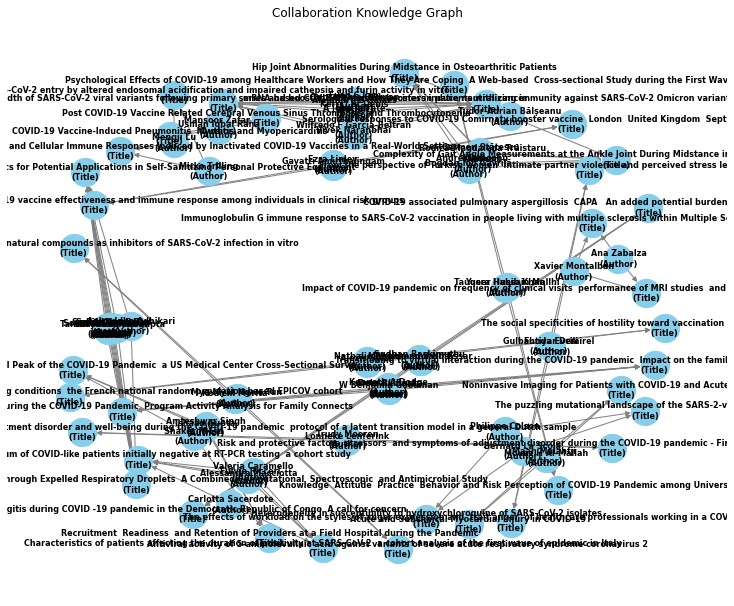

In [27]:
import networkx as nx
import matplotlib.pyplot as plt


# Create a directed graph
G = nx.DiGraph()

# Add nodes and edges to the graph
for (author1, author2), (titles_count, count) in collaborated_more_than_once.items():
    # Add authors as nodes
    G.add_node(author1, type='Author')
    G.add_node(author2, type='Author')

    # Add titles as nodes and edges
    for title, collab_count in titles_count.items():
        G.add_node(title, type='Title', count=collab_count)
        G.add_edge(author1, title)
        G.add_edge(author2, title)

# Visualize the knowledge graph
pos = nx.spring_layout(G, seed=42)
node_labels = {node: f"{node}\n({G.nodes[node]['type']})" for node in G.nodes}

plt.figure(figsize=(10, 8))
nx.draw(G, pos, with_labels=True, labels=node_labels, font_size=8, font_color='black', node_size=800, node_color='skyblue', font_weight='bold', edge_color='gray', arrowsize=10)
plt.title('Collaboration Knowledge Graph')
plt.show()


# 4.Building the NLP Model

In [64]:
import networkx as nx
import pandas as pd

# Construct a directed graph from the knowledge graph
G = nx.DiGraph()

# Add nodes and edges to the graph
for entity, properties in knowledge_graph1.items():
    node_type = properties["Type"]
    G.add_node(entity, type=node_type, **properties)

    if node_type == "Author":
        for title in properties["Titles"]:
            G.add_edge(entity, title)

# Feature engineering for authors
author_features = pd.DataFrame(index=knowledge_graph1.keys())

# Feature 1: Degree Centrality for Authors
degree_centrality = nx.degree_centrality(G)
author_features["Degree_Centrality"] = author_features.index.map(degree_centrality)

# Feature 2: Collaboration Strength for Authors
collaboration_strength = {author: sum(G[author][title].get("Count", 0) for title in G[author]) for author in author_features.index}
author_features["Collaboration_Strength"] = author_features.index.map(collaboration_strength)


# Feature 3: Keyword Relevance for Authors
keyword_relevance = {title: 'keyword' in G.nodes[title] for title in G.nodes if G.nodes[title]["type"] == "Title"}
author_features["Keyword_Relevance"] = author_features.index.map(lambda author: any(keyword_relevance[title] for title in G[author]))

# Display the engineered features for authors
author_features


,Degree_Centrality,Collaboration_Strength,Keyword_Relevance
Samit Kumar Ray,0.021739,0,False
Uttam Pal,0.021739,0,False
Nanoceutical Fabric Prevents COVID-19 Spread through Expelled Respiratory Droplets A Combined Computational Spectroscopic and Antimicrobial Study,0.097826,0,False
Development of Triboelectroceutical Fabrics for Potential Applications in Self-Sanitizing Personal Protective Equipment,0.097826,0,False
Tanusri Saha-Dasgupta,0.021739,0,False
...,...,...,...
Noninvasive Imaging for Patients with COVID-19 and Acute Chest Pain,0.021739,0,False
Gayatri Amirthalingam,0.021739,0,False
Ezra Linley,0.021739,0,False
Serological responses to COVID-19 Comirnaty booster vaccine London United Kingdom September to December 2021,0.021739,0,False


# 5. Model selection and training

In [77]:
import networkx as nx
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Construct a directed graph from the knowledge graph
G = nx.DiGraph()

# Add nodes and edges to the graph
for entity, properties in knowledge_graph1.items():
    node_type = properties["Type"]
    G.add_node(entity, type=node_type, **properties)

    if node_type == "Author":
        for title in properties.get("Titles", []):
            G.add_edge(entity, title)

# Feature engineering for nodes
node_features = pd.DataFrame(index=knowledge_graph1.keys())

# Feature 1: Degree Centrality for Nodes
degree_centrality = nx.degree_centrality(G)
node_features["Degree_Centrality"] = node_features.index.map(degree_centrality)

# Feature 2: Collaboration Strength for Authors
collaboration_strength = {entity: sum(G[entity][neighbor].get("Count", 0) for neighbor in G[entity]) for entity in node_features.index}
node_features["Collaboration_Strength"] = node_features.index.map(collaboration_strength)

# Binary classification task: Predicting future author collaborations
# Let's create a dataframe for binary classification
classification_data = pd.DataFrame(columns=['Author1', 'Author2', 'Collaborated'])

# Extract positive samples (authors who have collaborated)
for author1 in knowledge_graph1.keys():
    for author2 in knowledge_graph1.keys():
        if author1 != author2 and G.has_edge(author1, author2):
            classification_data = classification_data.append({'Author1': author1, 'Author2': author2, 'Collaborated': 1}, ignore_index=True)

# Extract negative samples (authors who have not collaborated)
for author1 in knowledge_graph.keys():
    for author2 in knowledge_graph.keys():
        if author1 != author2 and not G.has_edge(author1, author2):
            classification_data = classification_data.append({'Author1': author1, 'Author2': author2, 'Collaborated': 0}, ignore_index=True)

# Merge features with classification data
classification_data = classification_data.merge(node_features, left_on='Author1', right_index=True, how='left')
classification_data = classification_data.merge(node_features, left_on='Author2', right_index=True, suffixes=('_Author1', '_Author2'), how='left')

# Drop NaN values and split data into training and testing sets
classification_data.dropna(inplace=True)
X = classification_data.drop(['Author1', 'Author2', 'Collaborated'], axis=1)
y = classification_data['Collaborated']
y=y.astype('int')
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


C:\Users\HP\AppData\Local\Temp\ipykernel_1088\899528383.py:38: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  classification_data = classification_data.append({'Author1': author1, 'Author2': author2, 'Collaborated': 1}, ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_1088\899528383.py:38: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  classification_data = classification_data.append({'Author1': author1, 'Author2': author2, 'Collaborated': 1}, ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_1088\899528383.py:38: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  classification_data = classification_data.append({'Author1': author1, 'Author2': author2, 'Collaborated': 1}, ignore_index=True)
C:\Users\HP\AppData

C:\Users\HP\AppData\Local\Temp\ipykernel_1088\899528383.py:38: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  classification_data = classification_data.append({'Author1': author1, 'Author2': author2, 'Collaborated': 1}, ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_1088\899528383.py:38: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  classification_data = classification_data.append({'Author1': author1, 'Author2': author2, 'Collaborated': 1}, ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_1088\899528383.py:38: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  classification_data = classification_data.append({'Author1': author1, 'Author2': author2, 'Collaborated': 1}, ignore_index=True)
C:\Users\HP\AppData

C:\Users\HP\AppData\Local\Temp\ipykernel_1088\899528383.py:38: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  classification_data = classification_data.append({'Author1': author1, 'Author2': author2, 'Collaborated': 1}, ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_1088\899528383.py:38: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  classification_data = classification_data.append({'Author1': author1, 'Author2': author2, 'Collaborated': 1}, ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_1088\899528383.py:38: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  classification_data = classification_data.append({'Author1': author1, 'Author2': author2, 'Collaborated': 1}, ignore_index=True)
C:\Users\HP\AppData

C:\Users\HP\AppData\Local\Temp\ipykernel_1088\899528383.py:38: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  classification_data = classification_data.append({'Author1': author1, 'Author2': author2, 'Collaborated': 1}, ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_1088\899528383.py:38: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  classification_data = classification_data.append({'Author1': author1, 'Author2': author2, 'Collaborated': 1}, ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_1088\899528383.py:38: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  classification_data = classification_data.append({'Author1': author1, 'Author2': author2, 'Collaborated': 1}, ignore_index=True)
C:\Users\HP\AppData

In [78]:
y

0      1
1      1
2      1
3      1
4      1
      ..
111    1
112    1
113    1
114    0
115    0
Name: Collaborated, Length: 116, dtype: int32

In [79]:
X

,Degree_Centrality_Author1,Collaboration_Strength_Author1,Degree_Centrality_Author2,Collaboration_Strength_Author2
0,0.021739,0,0.097826,0
1,0.021739,0,0.097826,0
2,0.021739,0,0.097826,0
3,0.021739,0,0.097826,0
4,0.021739,0,0.097826,0
...,...,...,...,...
111,0.021739,0,0.021739,0
112,0.021739,0,0.021739,0
113,0.021739,0,0.021739,0
114,0.021739,0,0.021739,0


In [73]:
classification_data

,Author1,Author2,Collaborated,Degree_Centrality_Author1,Collaboration_Strength_Author1,Degree_Centrality_Author2,Collaboration_Strength_Author2
0,Samit Kumar Ray,Nanoceutical Fabric Prevents COVID-19 Spread t...,1,0.021739,0,0.097826,0
1,Samit Kumar Ray,Development of Triboelectroceutical Fabrics fo...,1,0.021739,0,0.097826,0
2,Uttam Pal,Nanoceutical Fabric Prevents COVID-19 Spread t...,1,0.021739,0,0.097826,0
3,Uttam Pal,Development of Triboelectroceutical Fabrics fo...,1,0.021739,0,0.097826,0
4,Tanusri Saha-Dasgupta,Nanoceutical Fabric Prevents COVID-19 Spread t...,1,0.021739,0,0.097826,0
...,...,...,...,...,...,...,...
111,Gayatri Amirthalingam,Pfizer-BioNTech and Oxford AstraZeneca COVID-1...,1,0.021739,0,0.021739,0
112,Ezra Linley,Serological responses to COVID-19 Comirnaty bo...,1,0.021739,0,0.021739,0
113,Ezra Linley,Pfizer-BioNTech and Oxford AstraZeneca COVID-1...,1,0.021739,0,0.021739,0
114,Samit Kumar Ray,Uttam Pal,0,0.021739,0,0.021739,0


In [82]:
clf = RandomForestClassifier()
clf.fit(X_train, y_train)

RandomForestClassifier()

# 6. Evaluation of the NLP model

In [83]:
# Make predictions on the test set
y_pred = clf.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 1.0
